In [0]:
#@title Imports
%matplotlib inline

import numpy as np
import matplotlib.colors
import matplotlib.pyplot as plt

import sklearn.linear_model
import sklearn.discriminant_analysis

import seaborn as sns
sns.set_style('whitegrid')

# Generative and discriminative classifiers

Suppose you have a dataset of $x^{(i)}, y^{(i)}$ pairs, where $x^{(i)}\in\mathbb{R}^D$ and $y^{(i)}\in\{0, 1, ..., C\}$.

A *classifier* is tasked with finding the label (or class) $y$ of a givan sample $x$. In probabilistic terms, the classifier should find
$$
p(y|x).
$$

The classification task can be oslved in two ways:
1. Directly, by modeling $p(y|x)$. We call such classifiers **discriminative**.
   
   E.g. logistic regression, with the model fit to data using the maximum likelihood principle.

2. Indirectly, by first modeling $p(y)$ and $p(x|y)$, then using the Bayes theorem to get $p(y|x)$. We call such models **generative**

   E.g. the Naive Bayes and the Gaussian Discriminant Analysis, defined below, are both generative. They are fit by modeling separately points belinging to the same class.

Generatively and discriminatively trained models approach the classification problem from two directions:
- generative models first learn to describe samples belongign to each class. Then, classification of a new sample amounts to finding a class that makes the observation the most probable.
- on the other hand, discriminative models are trained to find the few features that can set the two classes apart. Ideally, they will only focus on the few discriminating traits, and ignore everything else.


# Gaussian Discriminant Analysis

The GDA models a joint distribution $p(x,y) = p(x|y)p(y)$ with:
$$
\begin{align}
y &\sim \text{Bernoulli}(\phi) \\
x|y=0 & \sim\mathcal{N}(\mu_0, \Sigma_0) \\
x|y=1 & \sim\mathcal{N}(\mu_1, \Sigma_1)
\end{align}
$$

Which corresponds to the following expressions of probality:
$$
\begin{align}
p(y)     &= \phi^y(1-\phi)^{1-y}\\
p(x|y=0) &= \frac{1}{(2\pi)^{d/2}|\Sigma_0|^{1/2}}\exp\left(-\frac{1}{2}(x-\mu_0)^T\Sigma_0^{-1}(x-\mu_0)\right) \\
p(x|y=1) &= \frac{1}{(2\pi)^{d/2}|\Sigma_1|^{1/2}}\exp\left(-\frac{1}{2}(x-\mu_1)^T\Sigma_1^{-1}(x-\mu_1)\right)
\end{align}
$$

Using the Bayes theorem, we recover the decision boundary:
$$
\begin{split}
p(y=1|x) &= \frac{p(x|y=1)p(y=1)}{p(x|y=1)p(y=1) + p(x|y=0)p(y=0)}  
         &= \frac{1}{1+\frac{p(x|y=0)p(y=0)}{p(x|y=1)p(y=1)}}
\end{split}
$$

Let's expand the term in the denominator:
$$
\begin{split}
&\frac{p(x|y=0)p(y=0)}{p(x|y=1)p(y=1)} = \\
&\frac{\frac{1}{(2\pi)^{d/2}|\Sigma_0|^{1/2}}\exp\left(-\frac{1}{2}(x-\mu_0)^T\Sigma_0^{-1}(x-\mu_0)\right) (1-\phi)}{\frac{1}{(2\pi)^{d/2}|\Sigma_1|^{1/2}}\exp\left(-\frac{1}{2}(x-\mu_1)^T\Sigma_1^{-1}(x-\mu_1)\right) \phi}
\end{split}
$$

This leads to a quadratic boundary function and the resulting model is ofetn called "Quadratic disrciminant Analysis".

An interesintg simplification happens when $\Sigma_0=\Sigma_1=\Sigma$, i.e. when we asume that samles belonging to all classes have the same covariance matrix. Then:

$$
\begin{split}
&\frac{p(x|y=0)p(y=0)}{p(x|y=1)p(y=1)} = \\
&\frac{1-\phi}{\phi}exp\left(-\frac{1}{2}(x-\mu_0)^T\Sigma^{-1}(x-\mu_0) +\frac{1}{2}(x-\mu_1)^T\Sigma^{-1}(x-\mu_1) \right) =\\
&= \exp(-\Theta^T x)
\end{split}
$$
For a certain value of $\Theta$. Thus, the GDA's decision boundary is liear and the resulting model is called "Linear Discriminant Analysis" (LDA).

We note that while it computes the decision boundry using a firmula similar to logistic regression, i.e.
$$
p(y=1|x) = \frac{1}{1+\exp(-\Theta^T x)}
$$
it is trained in a very different fashion.


## LDA training
We fit the LDA model by maximizing the joint loglikelihood equal to
$$
\begin{split}
\mathcal{l}(\phi,\mu_0,\mu_1, \Sigma) &= \log\prod_{i=1}^{N}p(x^{(i)}, y^{(i)}; \phi,\mu_0,\mu_1, \Sigma) \\
&= \log\prod_{i=1}^{N}p(x^{(i)} | y^{(i)}; \mu_0,\mu_1, \Sigma)p(y^{(i)}; \phi)
\end{split}
$$

Maximizing the likelihood leads to intuitive formulas for the parameters:

$$
\begin{align}
\phi &= \frac{1}{N}\sum_{i=1}^{N}[y^{(i)}=1] \\
\mu_0 &= \frac{\sum_{i=1}^{N}[y^{(i)}=0]x^{(i)}}{\sum_{i=1}^{N}[y^{(i)}=0]} \\
\mu_1 &= \frac{\sum_{i=1}^{N}[y^{(i)}=1]x^{(i)}}{\sum_{i=1}^{N}[y^{(i)}=1]} \\
\Sigma &= \frac{1}{N}\sum_{i=1}^{N}(x^{(i)} - \mu_{y^{(i)}})(x^{(i)} - \mu_{y^{(i)}})^T \\
&= (1-\phi) \frac{\sum_{i: y^{(i)}=0}(x^{(i)} - \mu_{0})(x^{(i)} - \mu_{0})^T}{\sum_{i: y^{(i)}=0}1} + \phi \frac{\sum_{i: y^{(i)}=1}(x^{(i)} - \mu_{1})(x^{(i)} - \mu_{1})^T}{\sum_{i:y^{(i)}=1}1}
\end{align}
$$

We see that $\phi$ simply equals to the fration of samples belonging to class $1$, that the means $\mu_0$ and $\mu_1$ correspond to the means of samples in both classes and finally that the covariance matrix is just the weighted mean of the covariance matrices for each class.

## LDA vs Logistic regression

Once trained, LDA and logistic regression's predictions can be computed using the same formula. However, the classifiers are fitted using a different objective and thus will be different. Let's plot them on some exemplary data.

In [0]:
## Helper function
def plot_dec_boundary(X, Y, model, class_threshold=0.5):
    plt.scatter(X[0, :], X[1,:], c=Y, cmap='spring', edgecolors='black')
    nx, ny = 200, 100
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                            np.linspace(y_min, y_max, ny))
    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 1].reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap='spring',
                    norm=matplotlib.colors.Normalize(0., 1.), zorder=0)
    plt.contour(xx, yy, Z, [class_threshold], linewidths=1., colors='white')

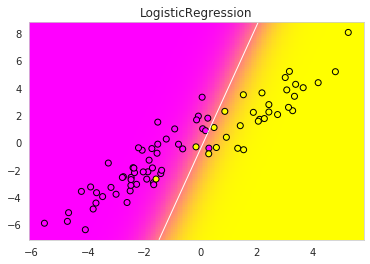

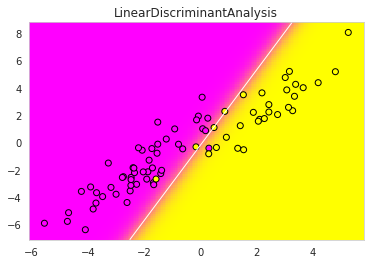

In [3]:
## Gen some data
Sigma = np.array([
    [1.0, 0.8],
    [0.8, 2.0]])
Mu0 = np.array([[-2], [-2]])  # Try also -1 , -1
Mu1 = np.array([[2], [2]])
N0 = 50
N1 = 30

X = np.concatenate([
    Mu0 + Sigma @ np.random.randn(2, N0),
    Mu1 + Sigma @ np.random.randn(2, N1)], axis=-1)
Y = np.concatenate([
    np.zeros(N0), np.ones(N1)], axis=0)


for model in [
    sklearn.linear_model.LogisticRegression(solver='lbfgs'),
    sklearn.discriminant_analysis.LinearDiscriminantAnalysis(),
]:
    model.fit(X.T, Y)

    plt.figure()
    plot_dec_boundary(X, Y, model)
    plt.title(model.__class__.__name__)

When the data is generated according to the LDA model the two classifiers act similarly. However, differences start to show up when the data is generated form a distribution that deviates from the normality assumtions.

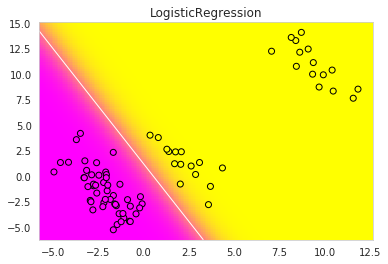

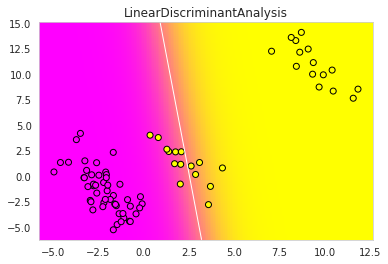

In [4]:
## Gen some data
Sigma = np.array([
    [1.0, -0.6],
    [-0.6, 2.0]])
Mu0 = np.array([[-2], [-2]])  # Try also -1 , -1
Mu11 = np.array([[2], [2]])
Mu12 = np.array([[10], [10]])
N0 = 50
N1 = 30

X = np.concatenate([
    Mu0 + Sigma @ np.random.randn(2, N0),
    Mu11 + Sigma @ np.random.randn(2, N1//2),
    Mu12 + Sigma @ np.random.randn(2, N1//2)], axis=-1)
Y = np.concatenate([
    np.zeros(N0), np.ones(N1)], axis=0)


for model in [
    sklearn.linear_model.LogisticRegression(solver='lbfgs'),
    sklearn.discriminant_analysis.LinearDiscriminantAnalysis(),
]:
    model.fit(X.T, Y)

    plt.figure()
    plot_dec_boundary(X, Y, model)
    plt.title(model.__class__.__name__)

# The relationship between LDA and Logistic Regression

While both classifiers separate the two classes using a hyperplane, they make different assumptions about the data:
- GDA (and in turn LDA and QGA) assume that the class-conditional data densities are normally distributed. Whtn this is satisfied, they have a better smaple efficiency than logistic regresion
- Logistic Regression makes no assumptions about the class conditional densities, and instead directly models the probability $p(y|x)$. This makes it more robust, but less sample efficient when the data is indeed normal.

In practice, Logistic Regression often works better!

# Naive Bayes and Logistic Regression

It turns out, that Naive Bayes and Logistic Regression are simiar as well.

Assume that each sample is described using $F$ discrete features, with $x_f$ denoting the value of the $f$-th feature.

Assume that the data is discrete. For Naive bayes we can model it directly, while for Logistic Regression we will need to encode each feature using a 1-hot encoding, in which we replace each discrete feature with a binary vector which is all zeros, except for a single one at the location corresponding to the discrete value.

For both classifiers the decision boundary takes the form:
$$
\sum_f \theta_{f,x_f} > c.
$$
In naive Bayes, $\theta_{f,x_f} = \log p(f=x_f|y=1) - \log p(f=x_f|y=0)$, while in the case of Logistic Regression $\Theta_{f,x_f}$ is the coefficeint of the $x_f$'s value of feature $f$ determined using optimization.

The two classifiers behave in a similar way:
- Naive Bayes has a stronger inductive bias, often working better on very small datasets and saturating to a worse error rates
- Logistic Regression needs more data to work well, but oftensaturates at better error rates than naive Bayes.

## Empirical comparision of generative and discriminative classifiers

Andrew Ng made an extensive comparision of performance of generative and discriminative classifiers, with main results summarised in [Figure 1](https://ai.stanford.edu/~ang/papers/nips01-discriminativegenerative.pdf).



# Further reading
- CS229 lecture notes on discriminative classifiers http://cs229.stanford.edu/notes2019fall/cs229-notes2.pdf
- Andrew Ng, Michael Jordan, "On discriminative vs. Generative classifiers: A comparison of logistic regression and naive bayes" https://ai.stanford.edu/~ang/papers/nips01-discriminativegenerative.pdf
- Bradley Efron "The Efficiency of Logistic Regression Compared to Normal Discriminant Analysis" http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.476.3459&rep=rep1&type=pdf
